In [1]:
import gdal
import os
import pandas as pd
path = os.getcwd()

In [2]:
dem = path + "/dem/Himalaya.tif"

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
gdal.AllRegister()

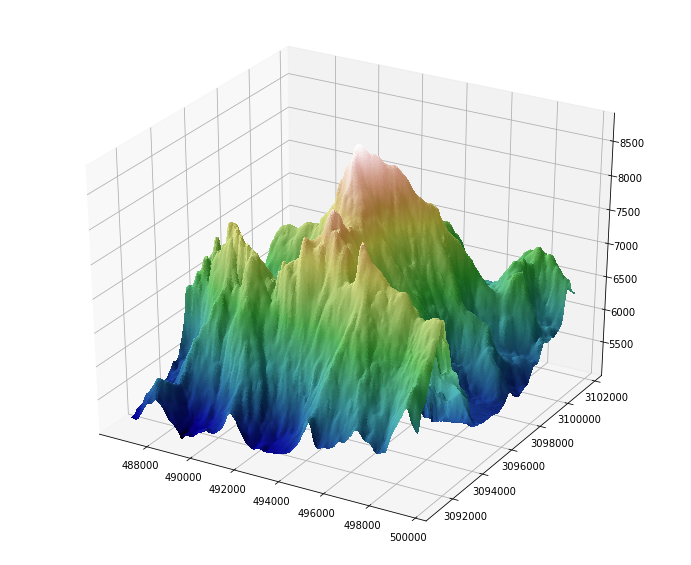

In [4]:
dataset = gdal.Open(dem)
adfGeoTransform = dataset.GetGeoTransform()
#用gdal去读写你的数据，当然dem只有一个波段
band = dataset.GetRasterBand(1)   
#读取数据的行列数
nrows  =  dataset.RasterXSize  
ncols   =  dataset.RasterYSize   

#DEM的平面四至
Xmin = adfGeoTransform[0]  
Ymin = adfGeoTransform[3]
Xmax = adfGeoTransform[0] + nrows * adfGeoTransform[1] \
        + ncols * adfGeoTransform[2]
Ymax = adfGeoTransform[3] + nrows * adfGeoTransform[4] \
        + ncols * adfGeoTransform[5]

#将数据的x，y，z化作numpy矩阵   
x = np.linspace(Xmin,Xmax, ncols)
y = np.linspace(Ymin,Ymax, nrows)
X,Y = np.meshgrid(x, y)
Z = band.ReadAsArray(0, 0,nrows, ncols) 

region = np.s_[10:400,10:400]
X, Y, Z = X[region], Y[region],Z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), 
                       figsize=(12,10))
ls = LightSource(270, 20)   

#设置你可视化数据的色带
rgb = ls.shade(Z, cmap=cm.gist_earth, 
               vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=rgb,
                        linewidth=0, antialiased=False, shade=False)
plt.show()